# Challenge 2: Anticipating Household Displacement in Communities

## Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import requests, io

In [ ]:
# Read housing dataset into Panda dataframe df

url = 'https://github.com/datakind/datakit-housing-fall-2024/releases/download/v1.0/housing-data.zip'
filename = "housing-data/CA/data_1-CA.csv"

r = requests.get(url)

with zipfile.ZipFile(io.BytesIO(r.content)) as myzip:
    with myzip.open(filename) as myfile:
        df = pd.read_csv(myfile)
df

,geoid,geoid_year,state,county,state_fips_code,county_fips_code,loan_amount,median_mortgage_amount,median_prop_value,median_sba504_loan_amount,...,s2701_c05_015e,s2701_c05_015m,s2701_c05_001e,s2701_c05_001m,b19083_001e,b19083_001m,economic_distress_pop_agg,economic_distress_simple_agg,investment_areas,opzone
0,6001400400,2020,6,1,6,1,6.144349e+02,825000.0,1775000.0,NaN,...,3.5,3.3,2.3,1.9,0.5063,0.0557,NO,NO,NO,0
1,6001400700,2020,6,1,6,1,7.888636e+03,585000.0,1225000.0,379000.0,...,2.8,2.2,2.5,1.6,0.4433,0.0512,YES,YES,YES,0
2,6001400800,2020,6,1,6,1,8.816275e+04,615000.0,995000.0,459500.0,...,0.0,2.1,2.9,2.9,0.5274,0.0727,NO,YES,YES,0
3,6001400900,2020,6,1,6,1,1.118500e+05,625000.0,1125000.0,329500.0,...,4.9,5.5,6.2,5.1,0.4619,0.0603,YES,YES,YES,0
4,6001401500,2020,6,1,6,1,2.697968e+05,515000.0,855000.0,391000.0,...,5.1,3.6,7.6,3.3,0.5611,0.0546,YES,YES,YES,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,6115040100,2020,6,115,6,115,7.243200e+04,235000.0,325000.0,409000.0,...,10.4,5.4,14.3,6.2,0.4669,0.0480,YES,YES,YES,0
2223,6115040304,2020,6,115,6,115,6.720994e+03,325000.0,415000.0,NaN,...,7.2,4.6,7.6,4.0,0.3243,0.0389,NO,NO,NO,0
2224,6115040600,2020,6,115,6,115,1.663000e+03,265000.0,355000.0,NaN,...,2.0,1.6,3.1,2.0,0.4340,0.0871,NO,YES,YES,0
2225,6115040800,2020,6,115,6,115,1.706129e+06,315000.0,455000.0,621000.0,...,1.0,1.3,3.7,2.4,0.4065,0.0490,NO,NO,NO,0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

,geoid,geoid_year,state,county,state_fips_code,county_fips_code,loan_amount,median_mortgage_amount,median_prop_value,median_sba504_loan_amount,median_sba7a_loan_amount,num_mortgage,num_mortgage_denials,num_mortgage_originated,number_of_sba504_loans,number_of_sba7a_loans,s0101_c03_032m,s0101_c03_032e,s0101_c05_032e,s0101_c05_032m,s0101_c01_032e,s0101_c01_032m,s0101_c04_021e,s0101_c04_021m,s0101_c06_021e,s0101_c06_021m,s0101_c02_021e,s0101_c02_021m,s0101_c04_024e,s0101_c04_024m,s0101_c06_024e,s0101_c06_024m,s0101_c02_024e,s0101_c02_024m,s0101_c04_025e,s0101_c04_025m,s0101_c06_025e,s0101_c06_025m,s0101_c02_025e,s0101_c02_025m,s0101_c04_023e,s0101_c04_023m,s0101_c06_023e,s0101_c06_023m,s0101_c02_023e,s0101_c02_023m,s0101_c04_026e,s0101_c04_026m,s0101_c06_026e,s0101_c06_026m,s0101_c02_026e,s0101_c02_026m,s0101_c04_027e,s0101_c04_027m,s0101_c06_027e,s0101_c06_027m,s0101_c02_027e,s0101_c02_027m,s0101_c04_020e,s0101_c04_020m,s0101_c06_020e,s0101_c06_020m,s0101_c02_020e,s0101_c02_020m,s0101_c04_028e,s0101_c04_028m,s0101_c06_028e,s0101_c06_028m,s0101_c02_028e,s0101_c02_028m,s0101_c04_029e,s0101_c04_029m,s0101_c06_029e,s0101_c06_029m,s0101_c02_029e,s0101_c02_029m,s0101_c04_030e,s0101_c04_030m,s0101_c06_030e,s0101_c06_030m,s0101_c02_030e,s0101_c02_030m,s0101_c04_031e,s0101_c04_031m,s0101_c06_031e,s0101_c06_031m,s0101_c02_031e,s0101_c02_031m,s0101_c04_022e,s0101_c04_022m,s0101_c06_022e,s0101_c06_022m,s0101_c02_022e,s0101_c02_022m,dp05_0035pe,dp05_0037pe,dp05_0038pe,dp05_0039pe,dp05_0044pe,dp05_0052pe,dp05_0057pe,b23025_004e,b23025_004m,b23025_005e,b23025_005m,b23025_006e,b23025_006m,b23025_002e,b23025_002m,s2001_c03_002e,s2001_c03_002m,s2001_c05_002e,s2001_c05_002m,s2001_c01_002e,s2001_c01_002m,s1903_c03_011e,s1903_c03_011m,s1903_c03_012e,s1903_c03_012m,s1903_c03_013e,s1903_c03_013m,s1903_c03_014e,s1903_c03_014m,s1903_c03_002e,s1903_c03_002m,s1903_c03_003e,s1903_c03_003m,s1903_c03_004e,s1903_c03_004m,s1903_c03_005e,s1903_c03_005m,s1903_c03_006e,s1903_c03_006m,s1903_c03_007e,s1903_c03_007m,s1903_c03_008e,s1903_c03_008m,s1903_c03_009e,s1903_c03_009m,s1903_c03_010e,s1903_c03_010m,s1903_c03_001e,s1903_c03_001m,s1701_c03_002e,s1701_c03_002m,s1701_c03_003e,s1701_c03_003m,s1701_c03_004e,s1701_c03_004m,s1701_c03_006e,s1701_c03_006m,s1701_c03_007e,s1701_c03_007m,s1701_c03_008e,s1701_c03_008m,s1701_c03_009e,s1701_c03_009m,s1701_c03_010e,s1701_c03_010m,s1701_c03_013e,s1701_c03_013m,s1701_c03_014e,s1701_c03_014m,s1701_c03_015e,s1701_c03_015m,s1701_c03_016e,s1701_c03_016m,s1701_c03_017e,s1701_c03_017m,s1701_c03_018e,s1701_c03_018m,s1701_c03_019e,s1701_c03_019m,s1701_c03_020e,s1701_c03_020m,s1701_c03_021e,s1701_c03_021m,s1701_c03_011e,s1701_c03_011m,s1701_c03_012e,s1701_c03_012m,s1701_c03_001e,s1701_c03_001m,s2701_c03_002e,s2701_c03_002m,s2701_c03_003e,s2701_c03_003m,s2701_c03_004e,s2701_c03_004m,s2701_c03_005e,s2701_c03_005m,s2701_c03_006e,s2701_c03_006m,s2701_c03_007e,s2701_c03_007m,s2701_c03_008e,s2701_c03_008m,s2701_c03_009e,s2701_c03_009m,s2701_c03_010e,s2701_c03_010m,s2701_c03_011e,s2701_c03_011m,s2701_c03_012e,s2701_c03_012m,s2701_c03_013e,s2701_c03_013m,s2701_c03_016e,s2701_c03_016m,s2701_c03_017e,s2701_c03_017m,s2701_c03_018e,s2701_c03_018m,s2701_c03_019e,s2701_c03_019m,s2701_c03_020e,s2701_c03_020m,s2701_c03_021e,s2701_c03_021m,s2701_c03_022e,s2701_c03_022m,s2701_c03_023e,s2701_c03_023m,s2701_c03_024e,s2701_c03_024m,s2701_c03_014e,s2701_c03_014m,s2701_c03_015e,s2701_c03_015m,s2701_c03_001e,s2701_c03_001m,s2701_c05_002e,s2701_c05_002m,s2701_c05_003e,s2701_c05_003m,s2701_c05_004e,s2701_c05_004m,s2701_c05_005e,s2701_c05_005m,s2701_c05_006e,s2701_c05_006m,s2701_c05_007m,s2701_c05_007e,s2701_c05_008e,s2701_c05_008m,s2701_c05_009e,s2701_c05_009m,s2701_c05_010e,s2701_c05_010m,s2701_c05_011e,s2701_c05_011m,s2701_c05_012e,s2701_c05_012m,s2701_c05_013e,s2701_c05_013m,s2701_c05_016e,s2701_c05_016m,s2701_c05_017e,s2701_c05_017m,s2701_c05_018e,s2701_c05_018m,s2701_c05_019e,s2701_c05_019m,s2701_c05_020e,s2701_c05_020m,s2701_c05_021e,s2701_c05_021m,s2701_c05

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Columns: 283 entries, geoid to opzone
dtypes: float64(231), int64(49), object(3)
memory usage: 4.8+ MB


In [ ]:
# Get the column names
column_names = df.columns.tolist()

# Print the column names
print(column_names)

['geoid', 'geoid_year', 'state', 'county', 'state_fips_code', 'county_fips_code', 'loan_amount', 'median_mortgage_amount', 'median_prop_value', 'median_sba504_loan_amount', 'median_sba7a_loan_amount', 'num_mortgage', 'num_mortgage_denials', 'num_mortgage_originated', 'number_of_sba504_loans', 'number_of_sba7a_loans', 's0101_c03_032m', 's0101_c03_032e', 's0101_c05_032e', 's0101_c05_032m', 's0101_c01_032e', 's0101_c01_032m', 's0101_c04_021e', 's0101_c04_021m', 's0101_c06_021e', 's0101_c06_021m', 's0101_c02_021e', 's0101_c02_021m', 's0101_c04_024e', 's0101_c04_024m', 's0101_c06_024e', 's0101_c06_024m', 's0101_c02_024e', 's0101_c02_024m', 's0101_c04_025e', 's0101_c04_025m', 's0101_c06_025e', 's0101_c06_025m', 's0101_c02_025e', 's0101_c02_025m', 's0101_c04_023e', 's0101_c04_023m', 's0101_c06_023e', 's0101_c06_023m', 's0101_c02_023e', 's0101_c02_023m', 's0101_c04_026e', 's0101_c04_026m', 's0101_c06_026e', 's0101_c06_026m', 's0101_c02_026e', 's0101_c02_026m', 's0101_c04_027e', 's0101_c04_027m

## Handling Missing Values

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
median_sba504_loan_amount,1085
number_of_sba504_loans,1085
number_of_sba7a_loans,569
median_sba7a_loan_amount,569
loan_amount,145
...,...
b23025_002e,0
b23025_002m,0
s2001_c03_002e,0
s2001_c03_002m,0


In [ ]:
# Count missing values in each column
missing_values = df.isnull().sum()

In [ ]:
# Calculate the percentage of missing values
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100

In [ ]:
# Create a DataFrame with column names, missing values count, and percentage
missing_df = pd.DataFrame({
    'Column Name': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': missing_percentage.values
})

In [ ]:
# Sort the DataFrame by the number of missing values in descending order
missing_df = missing_df.sort_values('Missing Values', ascending=False)

In [ ]:
# Display the results
print(missing_df)

                   Column Name  Missing Values  Percentage Missing
9    median_sba504_loan_amount            1085           48.720251
14      number_of_sba504_loans            1085           48.720251
15       number_of_sba7a_loans             569           25.550067
10    median_sba7a_loan_amount             569           25.550067
6                  loan_amount             145            6.511001
..                         ...             ...                 ...
107                b23025_002e               0            0.000000
108                b23025_002m               0            0.000000
109             s2001_c03_002e               0            0.000000
110             s2001_c03_002m               0            0.000000
282                     opzone               0            0.000000

[283 rows x 3 columns]


In [ ]:
# If you want to see only columns with missing values
print("\nColumns with missing values:")
print(missing_df[missing_df['Missing Values'] > 0])


Columns with missing values:
                  Column Name  Missing Values  Percentage Missing
9   median_sba504_loan_amount            1085           48.720251
14     number_of_sba504_loans            1085           48.720251
15      number_of_sba7a_loans             569           25.550067
10   median_sba7a_loan_amount             569           25.550067
6                 loan_amount             145            6.511001
8           median_prop_value              24            1.077683
12       num_mortgage_denials              21            0.942973
11               num_mortgage              21            0.942973
13    num_mortgage_originated              21            0.942973
7      median_mortgage_amount              21            0.942973


In [ ]:
# Handle all SBA-related columns at once
sba_columns = ['median_sba504_loan_amount', 'number_of_sba504_loans',
               'median_sba7a_loan_amount', 'number_of_sba7a_loans']

df[sba_columns] = df[sba_columns].fillna(0)


In [ ]:
# 3. Handle loan_amount (median imputation)
df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].median())

In [ ]:
columns_median_impute = [
    'median_prop_value',
    'num_mortgage_denials',
    'num_mortgage',
    'num_mortgage_originated',
    'median_mortgage_amount'
]

# Create dictionary of medians
fill_values = {col: df[col].median() for col in columns_median_impute}

# Fill all columns at once
df[columns_median_impute] = df[columns_median_impute].fillna(fill_values)

In [ ]:
# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
geoid                           0
geoid_year                      0
state                           0
county                          0
state_fips_code                 0
                               ..
b19083_001m                     0
economic_distress_pop_agg       0
economic_distress_simple_agg    0
investment_areas                0
opzone                          0
Length: 283, dtype: int64


In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
geoid,0
s2701_c03_003m,0
s2701_c03_006m,0
s2701_c03_006e,0
s2701_c03_005m,0
...,...
dp05_0057pe,0
b23025_004e,0
b23025_004m,0
b23025_005e,0


In [ ]:
df.head()

,geoid,geoid_year,state,county,state_fips_code,county_fips_code,loan_amount,median_mortgage_amount,median_prop_value,median_sba504_loan_amount,median_sba7a_loan_amount,num_mortgage,num_mortgage_denials,num_mortgage_originated,number_of_sba504_loans,number_of_sba7a_loans,s0101_c03_032m,s0101_c03_032e,s0101_c05_032e,s0101_c05_032m,s0101_c01_032e,s0101_c01_032m,s0101_c04_021e,s0101_c04_021m,s0101_c06_021e,s0101_c06_021m,s0101_c02_021e,s0101_c02_021m,s0101_c04_024e,s0101_c04_024m,s0101_c06_024e,s0101_c06_024m,s0101_c02_024e,s0101_c02_024m,s0101_c04_025e,s0101_c04_025m,s0101_c06_025e,s0101_c06_025m,s0101_c02_025e,s0101_c02_025m,s0101_c04_023e,s0101_c04_023m,s0101_c06_023e,s0101_c06_023m,s0101_c02_023e,s0101_c02_023m,s0101_c04_026e,s0101_c04_026m,s0101_c06_026e,s0101_c06_026m,s0101_c02_026e,s0101_c02_026m,s0101_c04_027e,s0101_c04_027m,s0101_c06_027e,s0101_c06_027m,s0101_c02_027e,s0101_c02_027m,s0101_c04_020e,s0101_c04_020m,s0101_c06_020e,s0101_c06_020m,s0101_c02_020e,s0101_c02_020m,s0101_c04_028e,s0101_c04_028m,s0101_c06_028e,s0101_c06_028m,s0101_c02_028e,s0101_c02_028m,s0101_c04_029e,s0101_c04_029m,s0101_c06_029e,s0101_c06_029m,s0101_c02_029e,s0101_c02_029m,s0101_c04_030e,s0101_c04_030m,s0101_c06_030e,s0101_c06_030m,s0101_c02_030e,s0101_c02_030m,s0101_c04_031e,s0101_c04_031m,s0101_c06_031e,s0101_c06_031m,s0101_c02_031e,s0101_c02_031m,s0101_c04_022e,s0101_c04_022m,s0101_c06_022e,s0101_c06_022m,s0101_c02_022e,s0101_c02_022m,dp05_0035pe,dp05_0037pe,dp05_0038pe,dp05_0039pe,dp05_0044pe,dp05_0052pe,dp05_0057pe,b23025_004e,b23025_004m,b23025_005e,b23025_005m,b23025_006e,b23025_006m,b23025_002e,b23025_002m,s2001_c03_002e,s2001_c03_002m,s2001_c05_002e,s2001_c05_002m,s2001_c01_002e,s2001_c01_002m,s1903_c03_011e,s1903_c03_011m,s1903_c03_012e,s1903_c03_012m,s1903_c03_013e,s1903_c03_013m,s1903_c03_014e,s1903_c03_014m,s1903_c03_002e,s1903_c03_002m,s1903_c03_003e,s1903_c03_003m,s1903_c03_004e,s1903_c03_004m,s1903_c03_005e,s1903_c03_005m,s1903_c03_006e,s1903_c03_006m,s1903_c03_007e,s1903_c03_007m,s1903_c03_008e,s1903_c03_008m,s1903_c03_009e,s1903_c03_009m,s1903_c03_010e,s1903_c03_010m,s1903_c03_001e,s1903_c03_001m,s1701_c03_002e,s1701_c03_002m,s1701_c03_003e,s1701_c03_003m,s1701_c03_004e,s1701_c03_004m,s1701_c03_006e,s1701_c03_006m,s1701_c03_007e,s1701_c03_007m,s1701_c03_008e,s1701_c03_008m,s1701_c03_009e,s1701_c03_009m,s1701_c03_010e,s1701_c03_010m,s1701_c03_013e,s1701_c03_013m,s1701_c03_014e,s1701_c03_014m,s1701_c03_015e,s1701_c03_015m,s1701_c03_016e,s1701_c03_016m,s1701_c03_017e,s1701_c03_017m,s1701_c03_018e,s1701_c03_018m,s1701_c03_019e,s1701_c03_019m,s1701_c03_020e,s1701_c03_020m,s1701_c03_021e,s1701_c03_021m,s1701_c03_011e,s1701_c03_011m,s1701_c03_012e,s1701_c03_012m,s1701_c03_001e,s1701_c03_001m,s2701_c03_002e,s2701_c03_002m,s2701_c03_003e,s2701_c03_003m,s2701_c03_004e,s2701_c03_004m,s2701_c03_005e,s2701_c03_005m,s2701_c03_006e,s2701_c03_006m,s2701_c03_007e,s2701_c03_007m,s2701_c03_008e,s2701_c03_008m,s2701_c03_009e,s2701_c03_009m,s2701_c03_010e,s2701_c03_010m,s2701_c03_011e,s2701_c03_011m,s2701_c03_012e,s2701_c03_012m,s2701_c03_013e,s2701_c03_013m,s2701_c03_016e,s2701_c03_016m,s2701_c03_017e,s2701_c03_017m,s2701_c03_018e,s2701_c03_018m,s2701_c03_019e,s2701_c03_019m,s2701_c03_020e,s2701_c03_020m,s2701_c03_021e,s2701_c03_021m,s2701_c03_022e,s2701_c03_022m,s2701_c03_023e,s2701_c03_023m,s2701_c03_024e,s2701_c03_024m,s2701_c03_014e,s2701_c03_014m,s2701_c03_015e,s2701_c03_015m,s2701_c03_001e,s2701_c03_001m,s2701_c05_002e,s2701_c05_002m,s2701_c05_003e,s2701_c05_003m,s2701_c05_004e,s2701_c05_004m,s2701_c05_005e,s2701_c05_005m,s2701_c05_006e,s2701_c05_006m,s2701_c05_007m,s2701_c05_007e,s2701_c05_008e,s2701_c05_008m,s2701_c05_009e,s2701_c05_009m,s2701_c05_010e,s2701_c05_010m,s2701_c05_011e,s2701_c05_011m,s2701_c05_012e,s2701_c05_012m,s2701_c05_013e,s2701_c05_013m,s2701_c05_016e,s2701_c05_016m,s2701_c05_017e,s2701_c05_017m,s2701_c05_018e,s2701_c05_018m,s2701_c05_019e,s2701_c05_019m,s2701_c05_020e,s2701_c05_020m,s2701_c05_021e,s2701_c05_021m,s2701_c05

## Data Analysis

In [ ]:
# Mortgage denial rates analysis
def analyze_mortgage_denials(df):
    df['denial_rate'] = df['num_mortgage_denials'] / df['num_mortgage']
    return df.groupby('county')['denial_rate'].mean().sort_values(ascending=False)

In [ ]:
# Economic distress analysis
def analyze_economic_distress(df):
    return df.groupby('economic_distress_pop_agg').size()

In [ ]:
# Age group vulnerability
def analyze_age_vulnerability(df):
    age_columns = [col for col in df.columns if 's0101_c01' in col]
    return df[age_columns].corr()

In [ ]:
# Opportunity zone analysis
def analyze_opportunity_zones(df):
    return df.groupby('investment_areas')[
        ['median_prop_value', 'num_mortgage_denials', 'median_mortgage_amount']
    ].mean()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def build_displacement_model(df):
    # Feature selection
    features = [
        'median_prop_value',
        'median_mortgage_amount',
        'b19083_001e',
        's1701_c03_001e',
        's2701_c03_001e'
    ]

    # Create target variable (example using economic distress)
    df['target'] = (df['economic_distress_pop_agg'] == 'YES').astype(int)

    X = df[features]
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    return model, model.score(X_test, y_test)

In [ ]:
def analyze_assistance_needs(df):
    return df[df['economic_distress_pop_agg'] == 'YES'].groupby('county')[
        ['s1903_c03_001e', 'num_mortgage_denials', 'median_prop_value']
    ].mean()

In [ ]:
# Run analyses
housing_pressure = analyze_mortgage_denials(df)
economic_risks = analyze_economic_distress(df)
demographic_risks = analyze_age_vulnerability(df)
geographic_patterns = analyze_opportunity_zones(df)
model, accuracy = build_displacement_model(df)
policy_needs = analyze_assistance_needs(df)

1. Which counties have the highest rates of mortgage denials, and what factors contribute to these high rates?

In [ ]:
housing_pressure

,denial_rate
county,
105,0.272409
23,0.198973
47,0.198002
53,0.191819
25,0.187190
65,0.176845
19,0.172324
71,0.169431
33,0.169418


**Observation:** The DataFrame lists counties with their average mortgage denial rates, sorted in descending order. Counties with the highest rates (e.g., county 105, county 23) might face significant challenges in mortgage approvals, indicating potential financial or economic issues specific to those areas. This could be due to stricter lending practices or high-risk profiles.

2. What is the distribution of economic distress among counties, and what characterizes distressed counties?

In [ ]:
economic_risks

,0
economic_distress_pop_agg,
NO,1425
YES,802


**Observation:** The DataFrame shows that there are 1,425 entries marked as "NO" and 802 marked as "YES" for economic distress. This distribution suggests that a substantial portion of the dataset's counties are experiencing economic distress, underlining the need for targeted policy measures.


3. How do different age groups correlate with economic risk factors, and which age demographics are most vulnerable?

In [ ]:
demographic_risks

,s0101_c01_032e,s0101_c01_032m
s0101_c01_032e,1.0,1.0
s0101_c01_032m,1.0,1.0


**Observation:** This DataFrame, which contains age-related columns and their correlations, indicates the relationships between different age metrics. A high correlation among age metrics might signal age-based demographic uniformity, while low correlations might indicate varied age group distributions affecting economic outcomes.

4. How do investment areas affect property values and mortgage denial rates?

In [ ]:
geographic_patterns

,median_prop_value,num_mortgage_denials,median_mortgage_amount
investment_areas,,,
NO,1.135601e+06,29.482578,522552.264808
YES,7.766311e+05,22.248378,416278.962002


**Observation:** The DataFrame includes metrics like median property values and the number of mortgage denials, grouped by investment areas. If the "YES" investment areas show higher median property values and mortgage denials, it might imply that while these areas attract investment, they also face affordability challenges.

5. How accurately can the model predict economic distress in counties, and which features contribute most to its predictions?

In [ ]:
model, accuracy

(RandomForestClassifier(), 0.7556053811659192)

**Observation:** The RandomForest model used to predict economic distress shows an accuracy of approximately 0.7556. This is a decent score, indicating that the chosen features (e.g., median_prop_value, median_mortgage_amount) are reasonably effective in predicting economic distress. However, there may be room for improvement in the model's performance.

6. Which counties identified as economically distressed require financial assistance based on their median income, mortgage denials, and property values?

In [ ]:
policy_needs

,s1903_c03_001e,num_mortgage_denials,median_prop_value
county,,,
1,-2.143187e+07,16.741935,9.553226e+05
3,1.011250e+05,9.000000,4.650000e+05
5,6.779050e+04,32.000000,4.500000e+05
7,5.230320e+04,22.400000,3.470000e+05
9,6.741800e+04,47.500000,4.450000e+05
11,7.061800e+04,16.750000,3.650000e+05
13,9.011390e+04,38.200000,6.290000e+05
15,5.584100e+04,20.000000,4.050000e+05
17,6.417250e+04,19.500000,6.650000e+05


**Observation:** This DataFrame provides average values for metrics such as median income, mortgage denials, and property value for counties marked as economically distressed. It highlights which counties might require more financial assistance based on their economic and housing profiles. For example, counties with lower median income and higher mortgage denials could be prioritized for aid.

## Visualizations

1. **Property Values vs Mortgage Denials**

In [ ]:
def plot_mortgage_trends(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x='median_prop_value', y='num_mortgage_denials')
    plt.title('Property Values vs Mortgage Denials')
    plt.show()

2. **Distribution of Economic Distress**

In [ ]:
def plot_economic_distress(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='economic_distress_pop_agg')
    plt.title('Distribution of Economic Distress')
    plt.show()

3. **Age Distribution**

In [ ]:
def plot_age_distribution(df):
    age_cols = [col for col in df.columns if 's0101_c01' in col]
    plt.figure(figsize=(15, 8))
    df[age_cols].mean().plot(kind='bar')
    plt.title('Age Distribution')
    plt.xticks(rotation=45)
    plt.show()

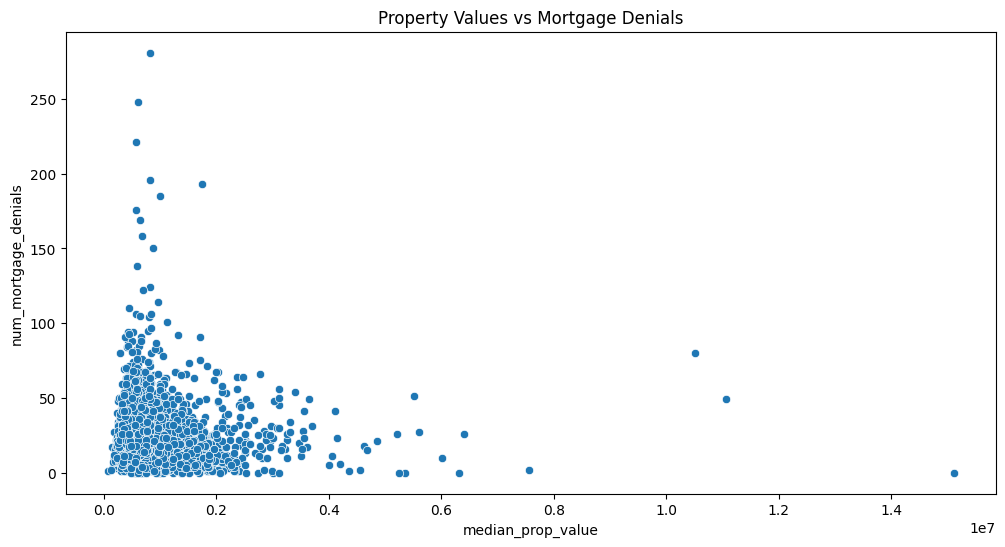

In [ ]:
# Create basic visualizations
plot_mortgage_trends(df)

**Observation:** Counties with higher property values show a varied number of mortgage denials. This suggests that higher property values might be linked to increased mortgage denials, possibly due to affordability issues or stricter lending criteria in areas with expensive real estate.

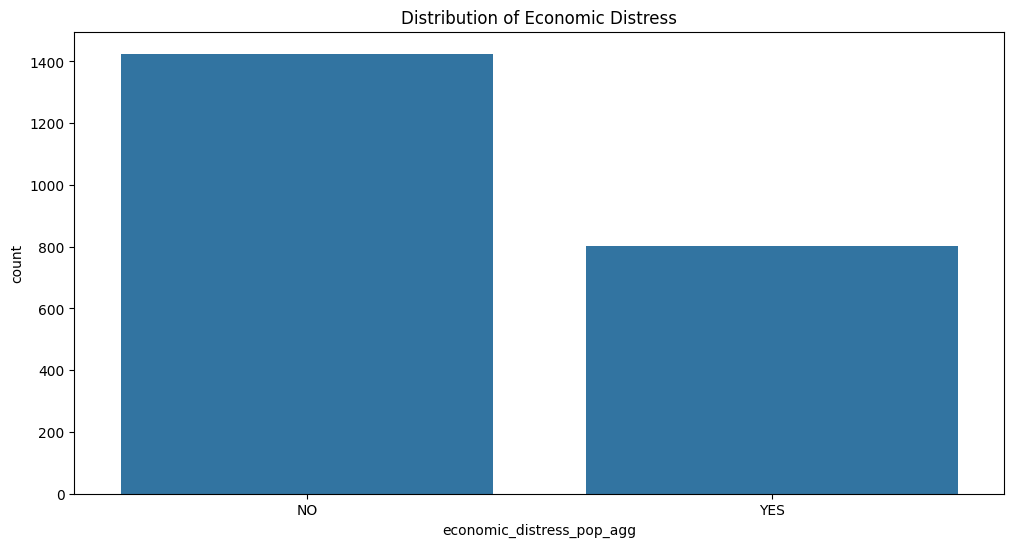

In [ ]:
plot_economic_distress(df)

**Observation:** The count plot indicates that a significant portion of the dataset's counties are marked as economically distressed. This highlights a potential need for targeted financial policies or support programs in these areas.

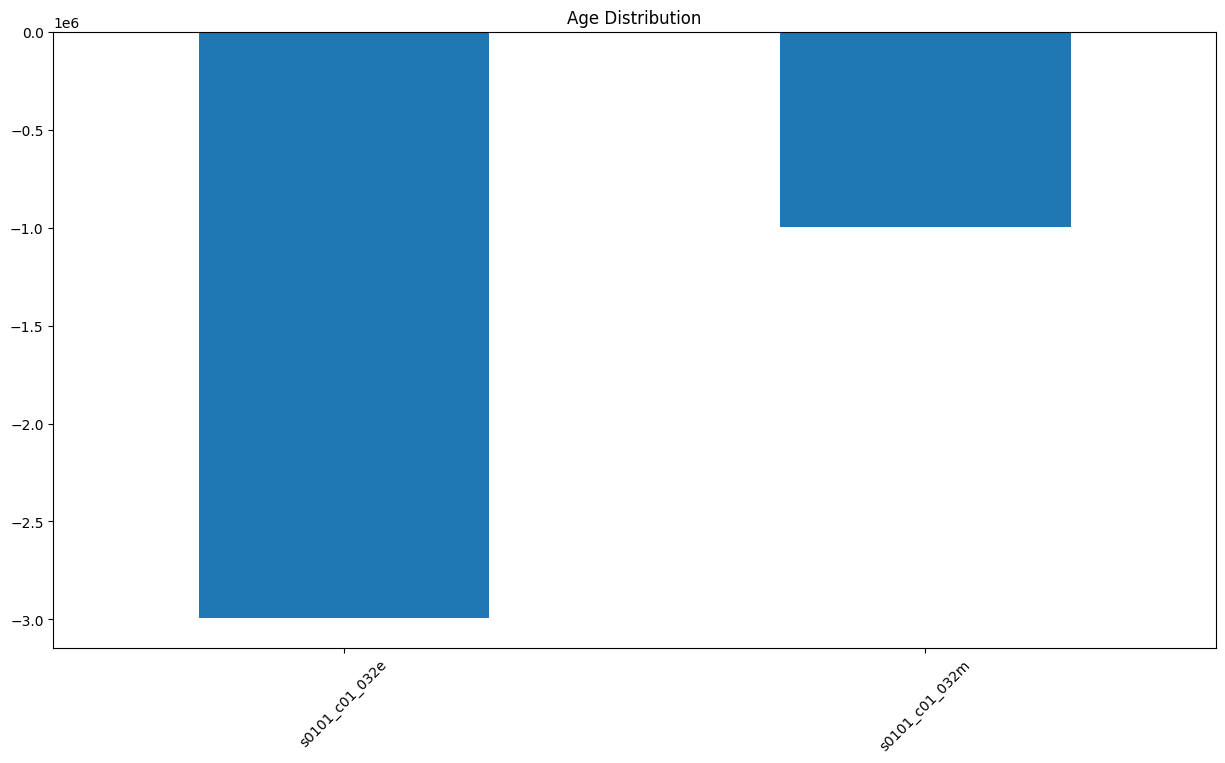

In [ ]:
plot_age_distribution(df)

**Observation:** The bar plot of average age-related metrics suggests that certain age groups might have a greater presence or influence in the dataset. This could indicate a potential correlation between specific age demographics and economic or housing trends.

4. **Demographic and Property Value Correlation:**

In [ ]:
def plot_demographic_property_trends(df):
    plt.figure(figsize=(15, 8))
    demographic_cols = ['dp05_0035pe', 'dp05_0037pe', 'dp05_0038pe', 'dp05_0039pe']
    sns.heatmap(
        df[demographic_cols + ['median_prop_value']].corr(),
        annot=True,
        cmap='viridis'
    )
    plt.title('Correlation: Demographics and Property Values')
    plt.show()

5. **Mortgage Denial Patterns**

In [ ]:
def visualize_employment_impact(df):
    employment_metrics = ['b23025_004e', 'b23025_005e', 'b23025_006e']

    fig = px.scatter(
        df,
        x='median_prop_value',
        y='num_mortgage_denials',
        size='b23025_004e',  # Employment numbers
        color='economic_distress_pop_agg',
        hover_data=['county'],
        title='Property Values vs Mortgage Denials by Employment'
    )
    fig.show()

6. **SBA Loan Distribution by Investment Areas**

In [ ]:
def plot_sba_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.kdeplot(
        data=df,
        x='median_sba504_loan_amount',
        hue='investment_areas',
        fill=True
    )
    plt.title('SBA Loan Distribution by Investment Areas')
    plt.show()

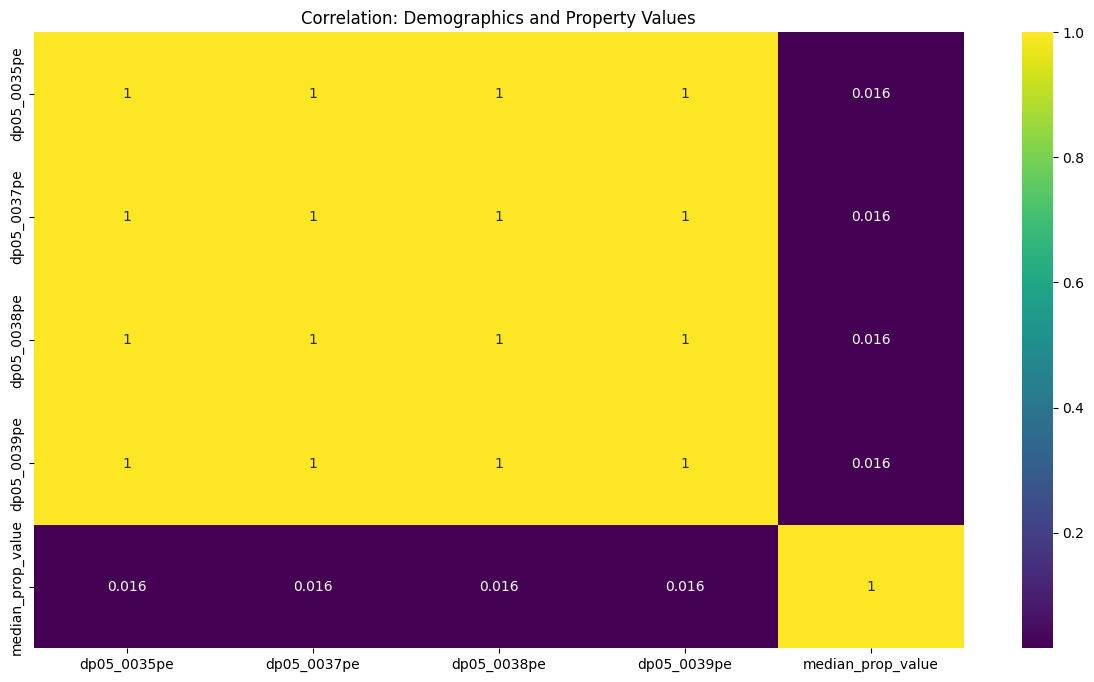

In [ ]:
plot_demographic_property_trends(df)

**Observation:** The correlation heatmap between demographic features and property values indicates potential relationships, such as whether specific demographic factors (e.g., age, population percentage) are associated with higher or lower property values.

In [ ]:
visualize_employment_impact(df)

**Observation:** The scatter plot with employment data, property values, and mortgage denials suggests that counties with higher employment figures may still experience mortgage denials, possibly due to factors like income inequality or high property costs. The plot differentiates between distressed and non-distressed counties, providing insight into how employment correlates with economic conditions.

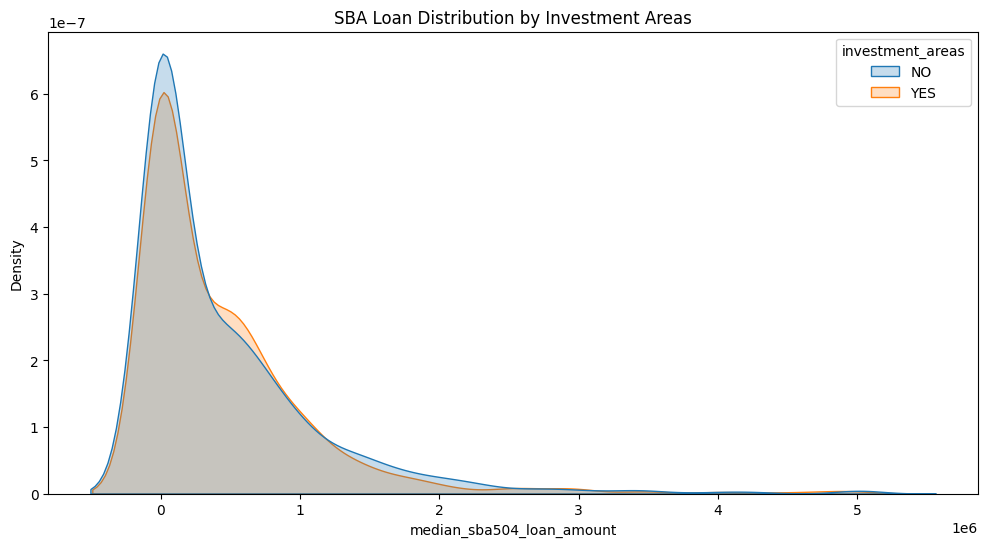

In [ ]:
plot_sba_distribution(df)

**Observation:** The KDE plot shows that SBA loan distributions differ across investment and non-investment areas. Areas designated for investment might have more diverse or higher distributions of loan amounts, indicating targeted financial interventions.

7. **Mortgage Distribution by Investment Areas**

In [ ]:
def visualize_loan_patterns(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df,
        x='investment_areas',
        y='num_mortgage',
        hue='economic_distress_pop_agg'
    )
    plt.title('Mortgage Distribution by Investment Areas')
    plt.xticks(rotation=45)
    plt.show()

8. **Health Insurance, Income, and Mortgage Relationships**

In [ ]:
def plot_insurance_economic_impact(df):
    fig = px.scatter_matrix(
        df,
        dimensions=['s2701_c03_001e', 's1903_c03_001e', 'num_mortgage_denials'],
        color='economic_distress_pop_agg',
        title='Health Insurance, Income, and Mortgage Relationships'
    )
    fig.show()

9. **Geographic Risk Clusters**

In [ ]:
def plot_risk_clusters(df):
    from sklearn.preprocessing import StandardScaler

    # Select relevant features
    features = ['s1903_c03_001e', 'median_prop_value', 'num_mortgage_denials']
    X = StandardScaler().fit_transform(df[features])

    # Create clusters
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=4).fit(X)
    df['risk_cluster'] = kmeans.labels_

    # Visualize clusters
    fig = px.scatter_3d(
        df,
        x='s1903_c03_001e',
        y='median_prop_value',
        z='num_mortgage_denials',
        color='risk_cluster',
        hover_data=['county'],
        title='Geographic Risk Clusters'
    )
    fig.show()

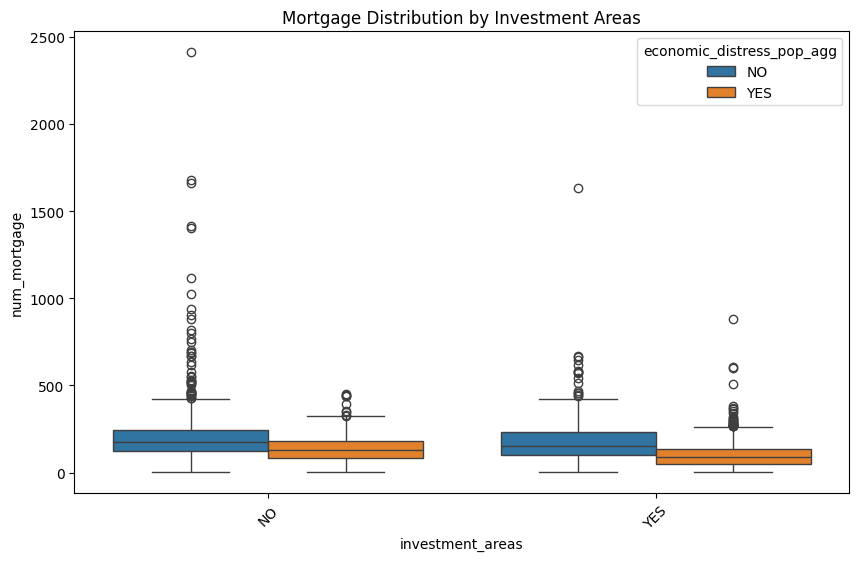

In [ ]:
visualize_loan_patterns(df)

**Observation:** The box plot showing mortgage distribution by investment areas and economic distress provides insight into the spread and median values of mortgages. Areas marked as investment zones may display different mortgage patterns, reflecting targeted economic development policies.

In [ ]:
plot_insurance_economic_impact(df)

**Observation:** The scatter matrix shows that counties with lower health insurance coverage often have higher mortgage denial rates, suggesting financial vulnerability. Higher median income is generally linked to fewer mortgage denials, emphasizing the importance of income for mortgage approvals. The color-coded economic distress status highlights that these trends are more pronounced in distressed areas. This indicates that health insurance and income levels play crucial roles in economic stability and mortgage access.

In [ ]:
plot_risk_clusters(df)

**Observation:** The 3D scatter plot of counties clustered by income, property value, and mortgage denials shows clear groupings of counties with similar risk profiles. This clustering could help identify regions that need financial assistance or policy interventions to mitigate economic risks.

10. **Mortgage Denial Patterns by Economic Status**

In [ ]:
def visualize_mortgage_patterns(df):
    # Calculate denial ratio
    df['denial_ratio'] = df['num_mortgage_denials'] / df['num_mortgage']

    fig = px.box(
        df,
        x='economic_distress_pop_agg',
        y='denial_ratio',
        color='investment_areas',
        points='all',
        title='Mortgage Denial Patterns by Economic Status'
    )
    fig.show()


In [ ]:
visualize_mortgage_patterns(df)

**Observation:** The plot of mortgage denial ratios by economic distress and investment area status shows that economically distressed areas might have higher denial rates. This reinforces the idea that economic status significantly impacts mortgage access.

##Conclusion

* The analyses reveal that counties with high mortgage denial rates, economic distress, and low median income are at greater risk of household displacement.

* Visualizations and model insights underscore the need for targeted interventions in economically distressed areas to improve housing affordability and financial stability.

* The findings provide valuable guidance for policymakers to prioritize support for vulnerable communities and proactively address the root causes of displacement.

* This challenge analysis forms a critical step toward developing data-driven strategies to mitigate displacement and foster community resilience.